In [ ]:
!pip install transformers[torch]

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import seaborn as sns

In [2]:
# Importing dataset
df=pd.read_csv('IMDB Dataset.csv')
print("Shape of data:",df.shape)

Shape of data: (50000, 2)


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#df=df.groupby('sentiment').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Types of sentiments',len(df['sentiment'].unique()))

Types of sentiments 2


In [5]:
# Dictionary of English Contractions
contractions_dict = { "ain`t": "are not","`s":" is","aren`t": "are not",
                     "can`t": "cannot","can`t`ve": "cannot have",
                     "`cause": "because","could`ve": "could have","couldn`t": "could not",
                     "couldn`t`ve": "could not have", "didn`t": "did not","doesn't": "does not",
                     "don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have",
                     "hasn`t": "has not","haven`t": "have not","he`d": "he would",
                     "he`d`ve": "he would have","he`ll": "he will", "he`ll`ve": "he will have",
                     "how`d": "how did","how`d`y": "how do you","how`ll": "how will",
                     "I`d": "I would", "I`d`ve": "I would have","I`ll": "I will",
                     "I`ll`ve": "I will have","I`m": "I am","I`ve": "I have", "isn`t": "is not",
                     "it`d": "it would","it`d`ve": "it would have","it`ll": "it will",
                     "it`ll`ve": "it will have", "let`s": "let us","ma`am": "madam",
                     "mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['review']=df['review'].apply(lambda x:expand_contractions(str(x)))

In [6]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:

df['cleaned']=df['review'].apply(lambda x: x.lower())

In [8]:
df.head(10)

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."
5,"Probably my all-time favorite movie, a story o...",positive,"probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"this show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [9]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [10]:
df.head(10)

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."
5,"Probably my all-time favorite movie, a story o...",positive,"probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"this show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [11]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [12]:
df.head(10)

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative ide...
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [13]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [14]:
df.head(10)

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative idea...
8,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [15]:
def countplot(x,title,xlabel,colorScheme):
  plt.figure(figsize=(10,10))
  sns.countplot(x=x,palette=colorScheme)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.show()

In [16]:
def pieplot(df,color,title):
  colors = sns.color_palette(color)[0:5]
  plt.figure(figsize = (8,8))
  df.value_counts(sort=False).plot.pie(colors=colors,autopct='%1.2f%%')
  plt.title(title)
  plt.show()

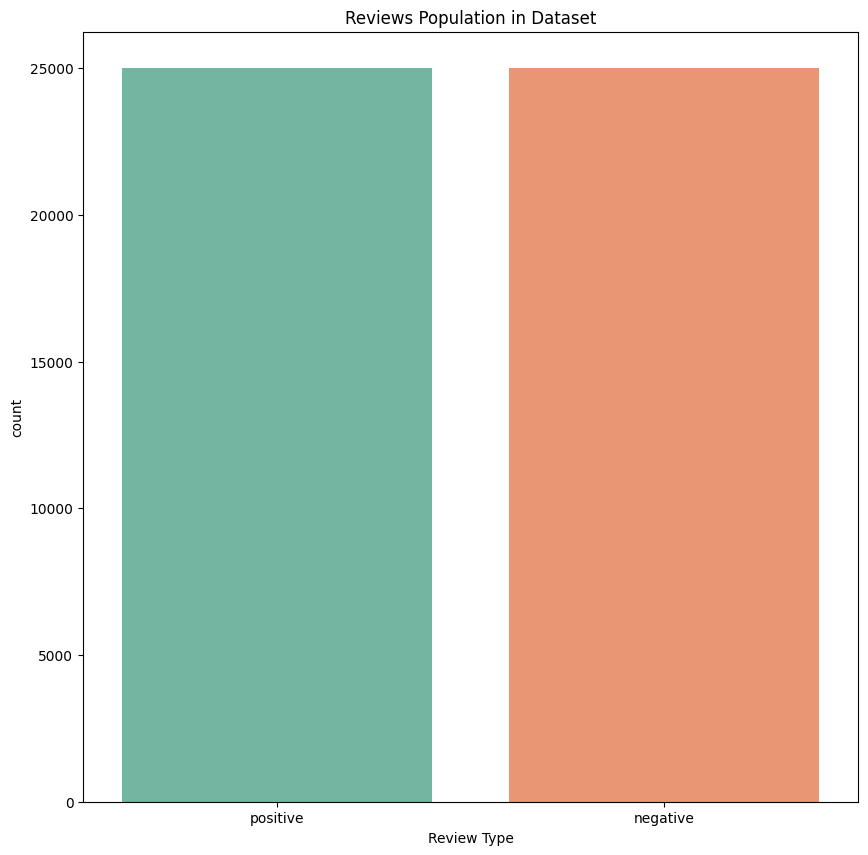

In [17]:
dataToPlot=df['sentiment']
colors="Set2"
plotTitle='Reviews Population in Dataset'
xlab='Review Type'

### Calling the countplot function of the library.py to plot the data with above parameters.
countplot(dataToPlot,plotTitle,xlab,colors)

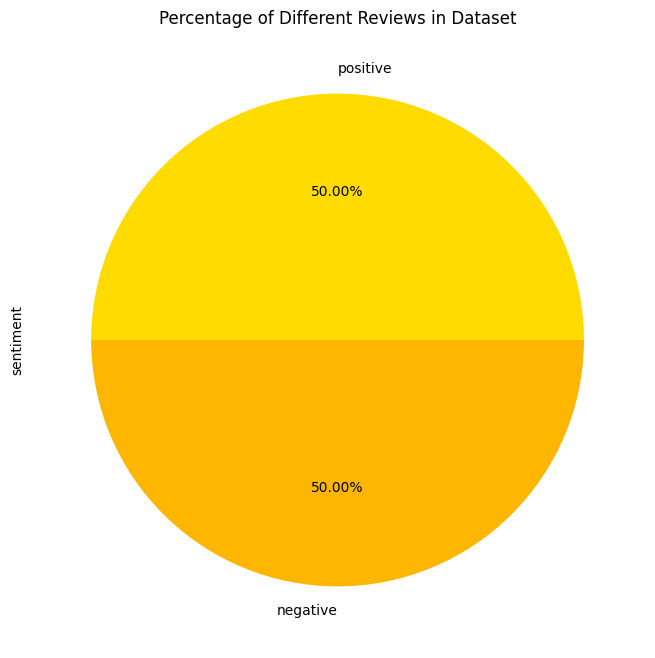

In [18]:
######### Setting arguments to pass to our pie plot function
df1=df['sentiment']
color='autumn_r'
title='Percentage of Different Reviews in Dataset'
##### Calling our pieplot function from our library.py file.
pieplot(df1,color,title)

In [19]:
myList = df['cleaned']
maximum_sentence_length = 0
count = 0
for i in range(len(myList)):
  if len(myList[i])>128:
    count = count +1

  if len(myList[i])>maximum_sentence_length:

    maximum_sentence_length= len(myList[i])

In [20]:
print(maximum_sentence_length)

13322


# **Doing the Necessary Imports**

There are different libraries and frameworks that we need to use for our projects. Some of them are pre-installed in Google Colab. Some we have to install according to our needs

In [21]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00


In [22]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00


In [23]:
import torch
import pandas as pd
from tqdm.notebook import trange, tqdm
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import random
from transformers import BertForSequenceClassification
import matplotlib.pyplot as plt
from datasets import Dataset, load_dataset
from transformers import Trainer

## Libraries and their purposes:

**tqdm**: tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means 'progress'. Since we are going to use BERT and it will require a good training time, using tqdm library will help us in visualing the progress of the training of the model.

**train_test_split**: It is a built in function of sklearn library which is a very famous library for Machine Learning tasks. The purpose of using this function of the sklearn library is to split the data into training and validation. Some portion of the data will be reserved for the purpose of the validation of the model while the other part of the data will be used for training. This built in function will help us in a clear data split.

**BertTokenizer**: The BERT Tokenizer is a tokenizer that works with BERT. It has many functionalities for any type of tokenization tasks. We can use the same tokenizer for all of the various BERT models that hugging face provides.

**TensorDataset**: Dataset stores the samples and their corresponding labels,

**DataLoader**: DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

**RandomSampler**: It returns random indices to access the dataset.

**SequentialSampler**: It returns sequential indices to access the dataset

**AdamW**: It is an optimizer function which is a variant of the optimizer Adam that has an improved implementation of weight decay.
Using weight decay is a form of regularization to lower the chance of overfitting.

**get_linear_schedule_with_warmup**: It is used to create a schedule with a learning rate that decreases linearly from the initial lr set in the optimizer to 0, after a warmup period during which it increases linearly from 0 to the initial lr set in the optimizer.

# **Custom Functions to Analyze Performance**

This is our custom function for calculating F1 Score. We will be calculating F1 Score after every epoch. F1 Score is a good criterion of measuring system performance as it is the harmonic mean of precision and recall of the classifier system.
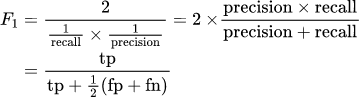

In [24]:
''' The following function takes two arguments
1. preds
2. labels
The first argument represents the predictions produced by the system while the second argument is the original labels.
We are taking both these arguments and first taking the maximum of the predictions and collapsing it into one dimension array and for labels, we are only using
flatten() function which return a copy of the array collapsed into one dimension. After that, we are passing those arguments to the built-in sklearn f1_score function
to calculate f1-score and this f1-score is returned by the function.
'''
def f1ScoreCalculation(preds, labels):
    prediction = np.argmax(preds, axis =1).flatten()

    label = labels.flatten()
    f1Score = f1_score(label, prediction, average='weighted')
    return f1Score

In [25]:
''' The following function takes two arguments
1. preds
2. labels
The first argument represents the predictions produced by the system while the second argument is the original labels.
We are taking both these arguments and first taking the maximum of the predictions and collapsing it into one dimension array and for labels, we are only using
flatten() function which return a copy of the array collapsed into one dimension. After that, we are passing those arguments to the built-in sklearn f1_score function
to calculate f1-score and this f1-score is returned by the function.
'''
def accuracyCalculation(preds, labels):
    prediction = np.argmax(preds, axis =1).flatten()
    # print('Prediction after flattening',prediction)
    # print('length of prediction',len(prediction))
    label = labels.flatten()
    # print('labels after flatten',label)
    # print('length of label',len(label))


    accuracy = accuracy_score(label, prediction)
    return accuracy

In [26]:
''' This function is used to determine the accuracy of each class. It will take two arguments.
1. Predictions
2. Labels
This function will calculate accuracy of each class and print the results.
'''
def classAccuracy(preds, label):
    labelsDictionary = {v: k for k, v in labels.items()}
    prediction = np.argmax(preds, axis =1 ).flatten()
    label = label.flatten()
    for i in np.unique(label):
        y_pred = prediction[label== i]
        y_true = label[label== i]
        acc = (len(y_pred[y_pred==i])/len(y_true))*100
        print(f'Class:{labelsDictionary[i]}')
        print(f'True Predictions:{len(y_pred[y_pred==i])}/{len(y_true)}\n')
        print(f'Accuracy:{acc}\n')

In [27]:
''' This function will be used to evaluate the performance of the model on the validation as well as test Dataset. It will take the dataloader as the input and
on the output it will return the averageLoss, predictions and the actual labels.
'''
def evaluate(validationLoader):
    model.eval()
    totalValidationLoss = 0
    predictions= []
    actualLabels = []
    for batch in tqdm(validationLoader):
        batch = tuple(b.to(device) for b in batch)
        modelInput = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],}
        with torch.no_grad():
            outputs = model(**modelInput)
        loss = outputs[0]
        logits = outputs[1]
        totalValidationLoss += loss.item()
        logits = logits.detach().cpu().numpy()
        labelIds = modelInput['labels'].cpu().numpy()
        predictions.append(logits)
        actualLabels.append(labelIds)
    averageLoss = totalValidationLoss/len(validationLoader)
    predictions = np.concatenate(predictions, axis=0)
    actualLabels = np.concatenate(actualLabels, axis=0)
    return averageLoss, predictions, actualLabels

In [28]:
''' This function will be called when we are trying to test our model on the random tweets to see the model performance on the user tweets
'''
def testSentence(trainer, sentence):
  id_tolabel = {1:'negative', 0: 'positive'}
  model = trainer.model.eval()
  tokenized = tokenizer(sentence, return_tensors='pt').to(model.device)
  with torch.no_grad():
     label = torch.argmax(trainer.model.forward(**tokenized).logits, dim=1)[0].cpu().item()
  return print('Sentiment of the tweet was:', id_tolabel[label])

In [29]:
''' These functions will be used to produce our results on the test dataset. sentenceTokenizer function is called inside the
testPredictions function. In testPredictions function, we give our dataset as the input argument which calls the first function to
tokenize the input and then use our model to produce the predictions.
'''
def sentenceTokenizer(examples):
    tokenizedSentences = tokenizer(examples['text'], padding=True, max_length=256, truncation=True, verbose=False)
    return tokenizedSentences
def testPredictions(dataframe):
    data = Dataset.from_pandas(dataframe)
    data = data.map(sentenceTokenizer, batched=False, load_from_cache_file=True)
    predictions = trainer.predict(test_dataset=data).predictions
    predictions = np.argmax(predictions, axis=1)
    return predictions

Since we know that in our dataset, we have two kinds of sentiments.

1. Neutral
2. Negative


We are going to create a dictionary that represents each sentiment with a unique label, so instead of our output labels being negative or positive, we will have 0 ,1  as our output labels with 0 representing positive, 1 representing negative.



In [30]:
typesOfSentiments = df.sentiment.unique()
labels = {}
for sentimentType, typesOfSentiments in enumerate(typesOfSentiments):
    labels[typesOfSentiments]= sentimentType

In [31]:
labels

{'positive': 0, 'negative': 1}

Now we are going to add another column in our dataset. We are going to name this column as label and we want to add the corresponding integers in our dataframe in place of the sentiment, so in the rows that will have 'negative' sentiment, the newly generated 'label' column will have 1 and similarly 0 for rows containing 'neutral' sentiment and 'positive' will have 2 in the rows.

In [32]:
df['label'] = df.sentiment.replace(labels)
df.tail(5)

,review,sentiment,cleaned,label
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,1
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,1
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,1
49999,No one expects the Star Trek movies to be high...,negative,no one expects the star trek movies to be high...,1


##Splitting our Dataset

Here we are going to split our dataset using the train_test_split() function of the sklearn library.

Here we have selected a test_size of 0.20 which means we are reserving 20% of our data for the testing purposes and 80% of the data will be used for training. Next, we are using a random_state=43 . This is a randomly choosen number to ensure the reproducibility of the results.
And we are using our labels to stratify the data which means that the original ratio of the three different classes that we have in the data before split will be retained in both the training and testing sets after splitting.

In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.20,
    random_state=43,
    stratify=df.label.values
)

Now that we have splitted our dataset, we want to add to add the split information to the original dataset to see which text entries belong to the training set and which belong to the validation set, for this purpose, we are creating another column with a 'DEFAULT' value which we will be replacing with either train or val depending whether it belong to the training set or the validation set.

In [34]:
df['trainOrValidation']= ['DEFAULT']*df.shape[0]

In [35]:
df.head()

,review,sentiment,cleaned,label,trainOrValidation
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,0,DEFAULT
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...,0,DEFAULT
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,0,DEFAULT
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,1,DEFAULT
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,0,DEFAULT


Now we are going to replace the 'DEFAULT' value by the indices that belong to 'training' or 'validation'

In [36]:
df.loc[X_train, 'trainOrValidation']='training'
df.loc[X_val, 'trainOrValidation']='validation'

In [37]:
df.tail(10)

,review,sentiment,cleaned,label,trainOrValidation
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,lame lame lame a minute cringefest thats minut...,1,validation
49991,"Les Visiteurs, the first movie about the medie...",negative,les visiteurs the first movie about the mediev...,1,validation
49992,John Garfield plays a Marine who is blinded by...,positive,john garfield plays a marine who is blinded by...,0,training
49993,Robert Colomb has two full-time jobs. He's kno...,negative,robert colomb has two fulltime jobs hes known ...,1,training
49994,This is your typical junk comedy.<br /><br />T...,negative,this is your typical junk comedybr br there ar...,1,training
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,0,training
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,1,validation
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,1,training
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,1,training
49999,No one expects the Star Trek movies to be high...,negative,no one expects the star trek movies to be high...,1,training


# **Loading Tokenizer and Data Encoding**

The tokenizer we are going to use is bert-base-uncased. We have the choice to choose various tokenizers from Hugging Face, we have used the ber-base-uncased here.

In [38]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased'
)

In [39]:
df['cleaned'] = df['cleaned'].astype(str)

Batch encode plus tokenize and prepare for the model a list of sequences or a list of pairs of sequences. Here we are going to first pass on the data that we want to encode, then we have set the add_special_tokens parameter to true. This parameter decides whether or not to encode the sequences with the special tokens relative to their model. So special tokens will be encoded in our case. Next, return_attention_mask (bool, optional) is set to True also to return the attention mask. We have also set padding to True which pads the short sequences in the batch to the longest sequence in batch for consistent length. We have also set the truncation to true to truncate longer sequences with the maximum length set at 256 meaning any sentence with longer than 256 tokens will be truncated.
Since we are going to work on Pytorch, we will be needing tensors, so we have set the return_tensors parameter to 'pt' as in this case we will be getting PyTorch torch.Tensor objects in return after encoding




In [40]:
trainingData = tokenizer.batch_encode_plus(
    df[df.trainOrValidation=='training'].cleaned.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

In [41]:
validationData = tokenizer.batch_encode_plus(
    df[df.trainOrValidation=='validation'].cleaned.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

Here after encoding we are getting three things
1. input_ids
2. token_type_ids
3. attention_mask

**input_ids**: It contains list of token ids to be fed to a model.

**token_type_ids**: It contains a list of token type ids to be fed to a model.  They are represented as a binary mask identifying the two types of sequence in the model.

**attention_mask**: It contains a list of indices specifying which tokens should be attended to by the model.

But we will only be using input_ids and attention_mask


In [42]:
trainingData

{'input_ids': tensor([[  101,  2028,  1997,  ...,  5510,  2005,   102],
        [  101,  1037,  6919,  ...,     0,     0,     0],
        [  101,  1045,  2245,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2572,  ...,     0,     0,     0],
        [  101, 10047,  2183,  ...,     0,     0,     0],
        [  101,  2053,  2028,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [43]:
trainingInputIds= trainingData['input_ids']
trainingAttentionMasks = trainingData['attention_mask']
trainingLabels = torch.tensor(df[df.trainOrValidation=='training'].label.values)

In [44]:
validationInputIds= validationData['input_ids']
validationAttentionMasks = validationData['attention_mask']
validationLabels = torch.tensor(df[df.trainOrValidation=='validation'].label.values)

# **Pytorch Dataset and Data Loader**

In [45]:
trainingData = TensorDataset(
    trainingInputIds,
    trainingAttentionMasks,
    trainingLabels
)

In [46]:
validationData = TensorDataset(
    validationInputIds,
    validationAttentionMasks,
    validationLabels
)

Once that we have created our training and validation datasets, we will be using dataloaders to load these datasets.
The most important argument of DataLoader constructor is dataset, which indicates a dataset object to load data from. For trainDataLoader, we are using RandomSampler which samples elements randomly. For validationLoader, we are using a SequentialSampler which samples elements sequentially in the same order always.

In [47]:
batchSize = 4
trainDataLoader = DataLoader(
    trainingData,
    sampler=RandomSampler(trainingData),
    batch_size=batchSize
)

validationDataLoader = DataLoader(
    validationData,
    sampler=SequentialSampler(validationData),
    batch_size=batchSize
)

#**Using the BERT Model**

WE are going to use BertForSequenceClassification model. It is a Bert Model transformer with a sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for GLUE tasks. This model is a PyTorch torch.nn.Module sub-class. We have set the output_attentions and output_hidden_states parameters as False. These are Bool parameters. We will not be getting hidden states and output attentions since we have set these to false.

In [48]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
     num_labels=len(labels),
     output_attentions=False,
     output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')


The model has 109,483,778 trainable parameters


##Setting Model HyperParameters

In [50]:
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-5,
    eps=1e-5
)

In [51]:
epochs = 5
scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=len(trainDataLoader)*epochs
)

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
seed = 43
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

#**Training Loop**

This is the section where we are training the model. During the training, we are using tqdm library to track the progress of the training to see how much training has been done and left. Also, while we are training the model, we are saving the results for each epochs such as training loss and training accuracy which we will be calculating with the help of custom functions we have created above. The results will be stored and later used for plotting the model performance during training after each epoch.

In [53]:
#### DECLARING LISTS TO STORE THE SYSTEM PERFORMANCE MEASURES ####


# This list will store average training loss
atl = []
# This will store validation loss after every epoch
vl= []
# This will store f1score for validaion after every epoch
f1sv = []
# This will store f1score for training after every epoch
f1st =[]
# This will store validation accuracy after each epoch
av = []
# This list will store training accuracy after each epoch
at = []


#### THIS IS THE TRAINING LOOP THAT WILL BE RUN FOR NUMBER OF EPOCHS ####
for epoch in tqdm(range(1, epochs+1)):
    trainPredictions=[]
    trainLabels=[]
    model.train()
    totalTrainingLoss = 0
    # in training loop we will be displaying one status bar to depict the overall training progress
    statusBar = tqdm(trainDataLoader,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)
    # a second bar in which we will be seeing the progress of every epoch in terms of batches
    for batch in statusBar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs ={
            'input_ids'    :batch[0],
            'attention_mask':batch[1],
            'labels'        :batch[2]
        }
        outputs = model(**inputs)
        loss = outputs[0]
        totalTrainingLoss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        statusBar.set_postfix(
            {'Training Loss': '{:.3f}'.format(loss.item()/len(batch))})
        # extracting the logits (predicted outputs) so we can prepare inputs for calculating training accuracy
        trainLogits = outputs[1]
        trainLogits = trainLogits.detach().cpu().numpy()
        trainLabelIds = inputs['labels'].cpu().numpy()
        trainPredictions.append(trainLogits)
        trainLabels.append(trainLabelIds)

    trainPredictions = np.concatenate(trainPredictions, axis=0)
    trainLabels = np.concatenate(trainLabels, axis=0)
    # print('training predictions after concatenation',trainPredictions)

    # print('length of training predictions',len(trainPredictions))
    # print('labels after concatenation',trainLabels)
    # print('length of labels after concatenaion',len(trainLabels))




    #### HERE WE ARE CALLING OUR SUPPORT FUNCTIONS WE CREATED ABOVE TO CALCULATE THE PERFORMANCES #####
    accuracyTraining= accuracyCalculation(trainPredictions,trainLabels)
    f1ScoreTraining= f1ScoreCalculation(trainPredictions,trainLabels)
    validationLoss, predictions, trueValues = evaluate(validationDataLoader)
    f1ScoreValidation= f1ScoreCalculation(predictions,trueValues)
    accuracyValidation = accuracyCalculation(predictions,trueValues)
    averageTrainingLoss= totalTrainingLoss/len(trainDataLoader)


    #### HERE WE ARE SAVING THE RESULTS OF EACH EPOCH IN THE LISTS SO WE CAN PLOT LATER ####
    atl.append(averageTrainingLoss)
    vl.append(validationLoss)
    f1sv.append(f1ScoreValidation)
    f1st.append(f1ScoreTraining)
    av.append(accuracyValidation)
    at.append(accuracyTraining)


    #### HERE WE ARE PRINTING THE LOSS, ACCURACY AND F1 SCORE AFTER EVERY EPOCH ####
    tqdm.write(f'\nEpoch {epoch}')
    tqdm.write(f'Training loss: {averageTrainingLoss}')
    tqdm.write(f'Validation Loss: {validationLoss}')
    tqdm.write(f'Validation Accuracy: {accuracyValidation}')
    tqdm.write(f'Training Accuracy: {accuracyTraining}')
    tqdm.write(f'F1 Score Validation: {f1ScoreValidation}')
    tqdm.write(f'F1 Score Training: {f1ScoreTraining}')
torch.save(model.state_dict(),f'customBERT{epoch}.model')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.3831510556971014
Validation Loss: 0.4057745531791996
Validation Accuracy: 0.9123
Training Accuracy: 0.898375
F1 Score Validation: 0.9121764982005945
F1 Score Training: 0.8983745624389754


Epoch 2:   0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.2374791143017952
Validation Loss: 0.38305867243849206
Validation Accuracy: 0.926
Training Accuracy: 0.948475
F1 Score Validation: 0.9259991445501109
F1 Score Training: 0.9484749025853627


Epoch 3:   0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.12959944853124797
Validation Loss: 0.4771581700318537
Validation Accuracy: 0.9228
Training Accuracy: 0.975075
F1 Score Validation: 0.9227953028662264
F1 Score Training: 0.9750749992366718


Epoch 4:   0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.06066999346719331
Validation Loss: 0.5524073401903624
Validation Accuracy: 0.9219
Training Accuracy: 0.989225
F1 Score Validation: 0.9218943568672836
F1 Score Training: 0.9892249970301397


Epoch 5:   0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.03600005950276473
Validation Loss: 0.5853091421638412
Validation Accuracy: 0.9244
Training Accuracy: 0.9943
F1 Score Validation: 0.9243998064635045
F1 Score Training: 0.9942999982757493


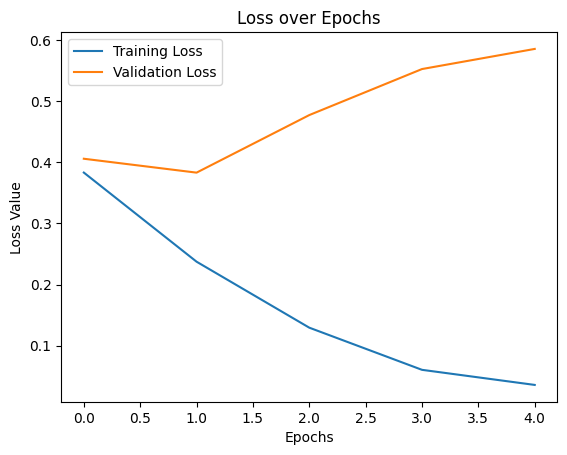

In [54]:
axis = np.arange(epochs)
plt.plot(axis,atl, label = 'Training Loss')
plt.plot(axis,vl, label = 'Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Loss over Epochs')
plt.show()

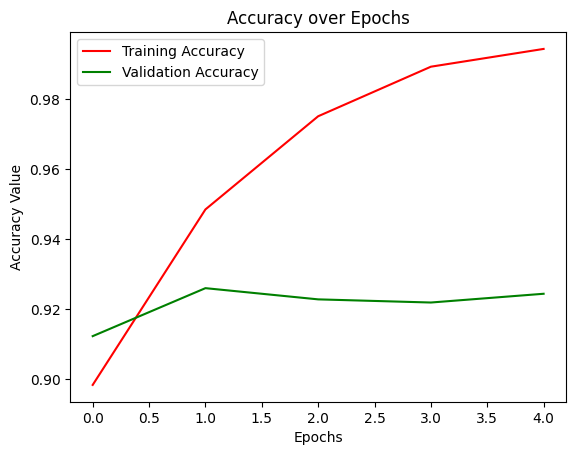

In [55]:
plt.plot(axis,at, label = 'Training Accuracy', color = 'red')
plt.plot(axis,av, label = 'Validation Accuracy', color = 'green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.title('Accuracy over Epochs')
plt.show()

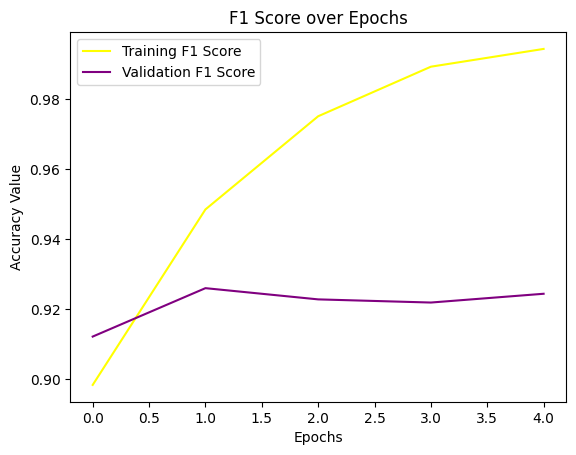

In [56]:
plt.plot(axis,f1st, label = 'Training F1 Score', color = 'yellow')
plt.plot(axis,f1sv, label = 'Validation F1 Score', color = 'purple')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.title('F1 Score over Epochs')
plt.show()

In [57]:
_, predictions, true_vals = evaluate(validationDataLoader)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [58]:
classAccuracy(predictions, true_vals)

Class:positive
True Predictions:4614/5000

Accuracy:92.28

Class:negative
True Predictions:4630/5000

Accuracy:92.60000000000001



# **Loading Saved Model and Using if on Test Dataset**

In [59]:
device = torch.device('cuda')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [60]:
PATH='customBERT5.model'

In [61]:
model.load_state_dict(torch.load(PATH,
                                 map_location=torch.device('cuda:0')))

<All keys matched successfully>

In [ ]:
trainer = Trainer(model=model, tokenizer=tokenizer)

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import shutil

# Source path (path to your trained model)
source_path = '/content/customBERT5.model'

# Destination path in your Google Drive
destination_path = '/content/drive/MyDrive/customBERT5.model'

# Copy the model
shutil.copyfile(source_path, destination_path)

print("Model copied to Google Drive!")


Model copied to Google Drive!


Checking Model Output on the random tweets. Here we are calling our testSentence function. We can change the tweets and see the results

In [ ]:
tweet1 = 'The movie was boring'
testSentence(trainer, tweet1)